### Customers Segmentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##### Data

In [3]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

In [4]:
order_products = order_products_prior.merge(products, on = 'product_id', how = 'left')
order_products = order_products.merge(aisles, on = 'aisle_id', how = 'left')
order_products = order_products.merge(departments, on = 'department_id', how = 'left')
order_products = order_products.merge(orders, on = 'order_id', how = 'left')
order_products.shape

(32434489, 15)

In [5]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [6]:
order_products.user_id.nunique()

206209

In [7]:
order_products.aisle.nunique()

134

##### Segmentation

In [9]:
cross_df = pd.crosstab(order_products.user_id,order_products.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [10]:
df = cross_df.div(cross_df.sum(axis=1),axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [11]:
df.shape

(206209, 134)

##### PCA and K-Means Clustering

In [12]:
pca = PCA(n_components = 10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018866,-0.088344,-0.104558,-0.116425,0.083734,-0.062686,-0.026200
1,-0.036988,0.108884,-0.066406,-0.123271,0.098848,-0.033961,-0.054738,-0.053339,-0.020424,-0.008334
2,0.064282,0.103962,0.000710,-0.012220,-0.046984,0.112234,-0.029802,0.007916,0.012263,0.001664
3,-0.093210,0.054093,0.001867,-0.003974,-0.071359,-0.019280,-0.025104,-0.038243,0.006484,-0.000717
4,0.094629,-0.037051,-0.024952,-0.021575,0.055370,0.107653,-0.008036,0.103932,0.051788,-0.025780


In [15]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans = kmeans.fit(df_pca)
    Sum_of_squared_distances.append(kmeans.inertia_)

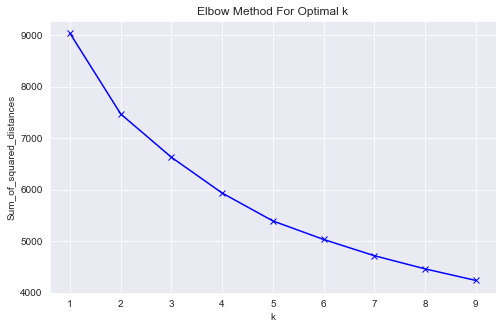

In [16]:
plt.subplots(figsize = (8,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
clusters = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = clusters.cluster_centers_
c_preds = clusters.predict(df_pca)
print(centers)

[[ 6.75078794e-02  1.05716214e-01 -1.14221660e-03 -3.09336771e-02
  -1.07023424e-02  7.22513059e-03 -5.20611432e-04  4.51623728e-03
  -7.18516715e-04 -1.64381109e-04]
 [-1.98201878e-01  1.61379566e-02  3.16916629e-01 -3.13692976e-02
   1.86338223e-02  5.64518510e-04  4.01019807e-03  1.09252231e-02
   1.23240099e-03 -3.82835241e-03]
 [-7.39220810e-02 -1.06013694e-02 -2.70272728e-02 -6.98749005e-03
  -6.75955293e-03  1.54267622e-03  5.07356683e-04 -2.53834830e-03
  -3.26690108e-04 -4.07033474e-04]
 [ 1.05576711e-01 -7.31240628e-02  1.72645906e-02  3.68233415e-03
   1.77185196e-03 -4.44692361e-03 -9.47862349e-04  1.29242115e-03
  -1.68678248e-04  7.70004074e-04]
 [-6.10643861e-03  1.30762099e-01  4.85882279e-03  2.30175579e-01
   1.10155322e-01 -2.28382205e-02  7.35513167e-05 -6.41181022e-03
   7.84290813e-03  3.06597446e-03]]


##### Visualizing clustering - first two principal components

In [18]:
df = df_pca.iloc[:,0:2]
df.columns = ['pc1','pc2']
df['cluster'] = c_preds
df.head()

<ipython-input-18-1932620409cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = c_preds


,pc1,pc2,cluster
0,-0.113443,0.039084,2
1,-0.036988,0.108884,0
2,0.064282,0.103962,0
3,-0.093210,0.054093,2
4,0.094629,-0.037051,3


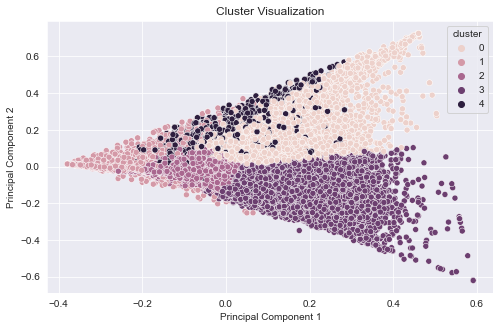

In [19]:
fig,ax = plt.subplots(figsize=(8,5))
ax = sns.scatterplot(data = df, x = 'pc1', y = 'pc2', hue = 'cluster')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Cluster Visualization')
plt.show()

##### Top Products per Cluster

In [20]:
cross_df['cluster'] = c_preds
cluster1 =  cross_df[cross_df.cluster == 0]
cluster2 =  cross_df[cross_df.cluster == 1]
cluster3 =  cross_df[cross_df.cluster == 2]
cluster4 =  cross_df[cross_df.cluster == 3]
cluster5 =  cross_df[cross_df.cluster == 4]

In [21]:
cluster1.shape

(37926, 135)

In [22]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending = False)[0:10]

aisle
fresh fruits                     35.757686
fresh vegetables                 15.045879
packaged vegetables fruits       12.103781
yogurt                            9.895322
milk                              5.961399
packaged cheese                   5.115224
soy lactosefree                   3.779887
water seltzer sparkling water     3.613036
bread                             3.198307
chips pretzels                    3.134604
dtype: float64

In [23]:
cluster2.shape

(5417, 135)

In [25]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending = False)[0:10]

aisle
water seltzer sparkling water    20.946834
fresh fruits                      3.335979
soft drinks                       2.803397
yogurt                            2.255307
energy granola bars               1.556766
chips pretzels                    1.346686
tea                               1.329887
milk                              1.326749
packaged vegetables fruits        1.251061
soy lactosefree                   1.082518
dtype: float64

In [26]:
cluster3.shape

(99117, 135)

In [27]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending = False)[0:10]

aisle
fresh fruits                     9.767164
fresh vegetables                 7.571506
yogurt                           7.217632
packaged vegetables fruits       5.999556
packaged cheese                  4.931334
chips pretzels                   4.480795
milk                             4.252722
water seltzer sparkling water    4.091195
refrigerated                     3.257504
ice cream ice                    3.097864
dtype: float64

In [28]:
cluster4.shape

(55801, 135)

In [29]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 37.044300
fresh fruits                     21.745578
packaged vegetables fruits       12.027186
yogurt                            6.159639
packaged cheese                   5.018996
fresh herbs                       4.151592
milk                              4.003118
soy lactosefree                   3.704844
frozen produce                    3.302073
water seltzer sparkling water     3.080626
dtype: float64

In [30]:
cluster5.shape

(7948, 135)

In [31]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
packaged produce                 18.354051
fresh fruits                     10.877453
packaged vegetables fruits        4.240186
fresh vegetables                  3.105813
water seltzer sparkling water     1.714519
milk                              1.615627
packaged cheese                   1.544162
frozen produce                    1.144942
chips pretzels                    1.139155
nuts seeds dried fruit            1.033090
dtype: float64